# Problem statement: With the iris dataset we need to cluster iris flowers into certain groups.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load data set

data=pd.read_csv('iris.csv')

In [6]:
data

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)

# EDA

In [11]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# Quick summary of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [15]:
# statistical information of dataset

data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

<Axes: xlabel='sepal_length'>

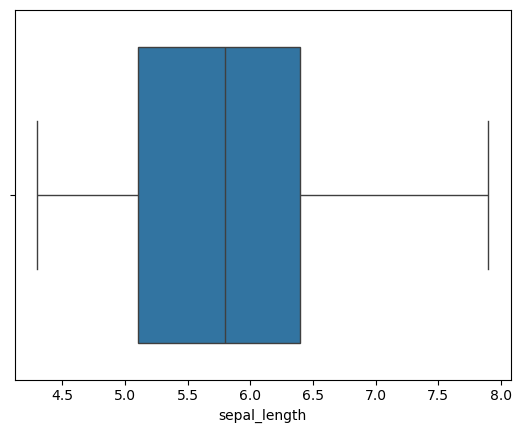

In [19]:
# Impute outliers if present

sns.boxplot(data=data,x='sepal_length')

<Axes: xlabel='sepal_width'>

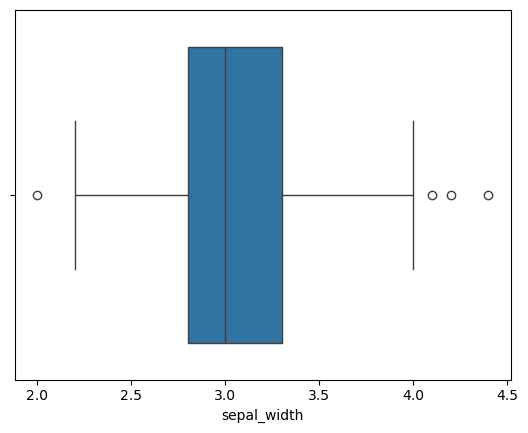

In [21]:
sns.boxplot(data=data,x='sepal_width')

In [29]:
data.loc[data['sepal_width']>4.0]=np.median(data['sepal_width'])

In [31]:
data.loc[data['sepal_width']==2.0]=np.median(data['sepal_width'])

<Axes: xlabel='sepal_width'>

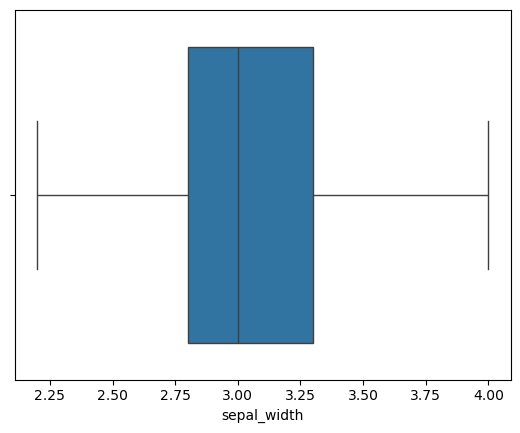

In [33]:
sns.boxplot(data=data,x='sepal_width')

<Axes: xlabel='petal_length'>

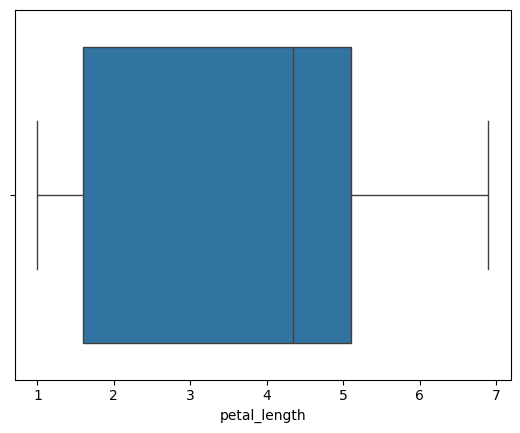

In [23]:
sns.boxplot(data=data,x='petal_length')

<Axes: xlabel='petal_width'>

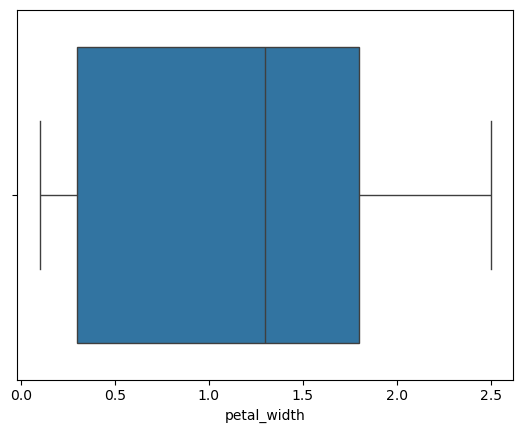

In [25]:
sns.boxplot(data=data,x='petal_width')

# Elbow Method

In [36]:
from sklearn.cluster import KMeans

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
print(wcss)    

[813.8834, 241.9772426470588, 144.38226823708206, 82.122178289188, 61.80782193126022, 46.432702623993094, 40.339491205252074, 36.78443788819875, 29.767134875993573, 33.558529232292535]


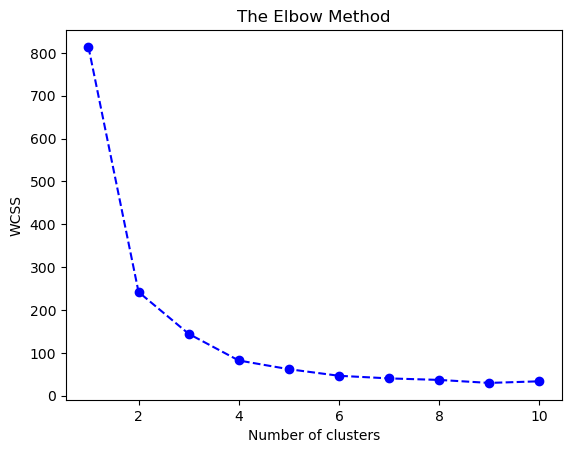

In [38]:
# Visualizing the Elbow

# plt,figure(figsize=(10,4))  # giving the figure/diagram size

plt.plot(range(1,11),wcss,ls='--',marker='o',color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
# we will take the optimal value of k as 3
model=KMeans(n_clusters=3)

# Training the model
model.fit(data)

KMeans(n_clusters=3)

In [65]:
model.labels_   #prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
# Set colours to clusters to differentiate (Not required in main implimentation)

color_scheme=np.array(['red','blue','green','yellow','pink','cyan'])
color_scheme

array(['red', 'blue', 'green', 'yellow', 'pink', 'cyan'], dtype='<U6')

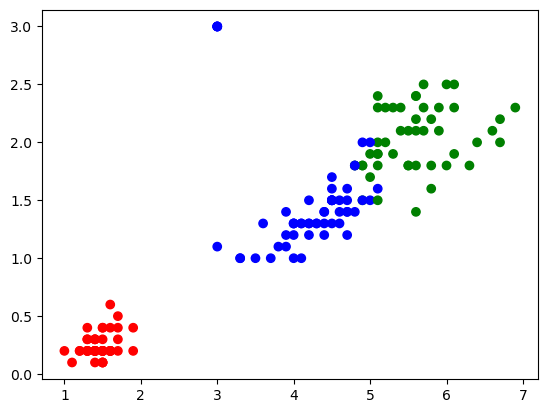

In [69]:
# visualize the clusters formed by the model(Not required in main implimentation)
plt.scatter(data['petal_length'],data['petal_width'],color=color_scheme[model.labels_])
plt.show()

# Evaluation Matrics

In [71]:
from sklearn.metrics import silhouette_score
score=silhouette_score(data,model.labels_)
score  #k=3

0.5348854082689188